# Rotating Power Spectra

This notebook explores the effect of band ratios when power spectrum are rotated around different frequency points.

To do this analysis, we will simulate power spectra, and rotate them, different amounts, around different frequency points. 

This is to explore if and how exponent changes around different rotation points effect band ratio measures. 

Note that rotating a power spectrum around a frequency point is analogous to an exponent change. 

By default, different exponents as simulated by FOOOF rotate around frequency of 0. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fooof.sim import *
from fooof.plts import plot_spectra

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import *
from settings import *
from paths import DATA_PATHS as dp

### Rotating Power Spectra

Here we will explore the affects that rotating the power spectrum around a given frequency has on resulting band ratio values. 

We have two free parameters to set: the frequency where we rotate, and the amount of rotation.

In [3]:
# Calculate power spectra which varying rotational frequency and rotation amount
fs, ps = gen_power_spectrum(FREQ_RANGE, AP_DEF, ROT_OSC)
output = np.zeros(shape=(len(ROTS), len(DELS), len(fs)))

rot_freq_step = Stepper(ROT_FREQS[0], ROT_FREQS[1], ROT_INC)

for rot_ind, rot_val in enumerate(rot_freq_step):
    delta_step = Stepper(DEL_RANGE[0], DEL_RANGE[1], DEL_INC)
    for del_ind, del_val, in enumerate(delta_step):
        output[rot_ind, del_ind, :] = rotate_spectrum(fs, ps, del_val, rot_val)

# Save out simulated rotation data
np.save(dp.make_file_path(dp.demo, 'rotation', 'npy'), output)

In [4]:
# Reload saved out rotation data
#    Data is organized as: [rotations, deltas, freqs]
impt = np.load(dp.make_file_path(dp.demo, 'rotation', 'npy'))

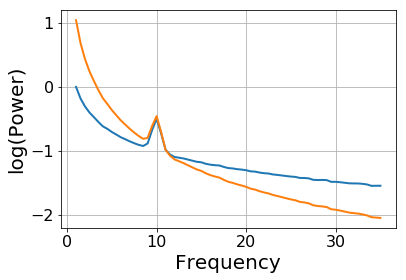

In [5]:
# Plot some examples of the rotated power spectra
#    Note that the selected examples have a rotation (change in exponent), rotated at around 10 Hz
plot_psds = [output[0, 0, :], output[10, 10, :]]
plot_spectra(fs, plot_psds, log_powers=True)

In [6]:
# Calculate Theta/Beta ratio for rotational power spectra.
ratios = np.zeros(shape =(len(impt), len(impt[0])) )
for rot_ind, rot_val in enumerate(impt):
    
    for del_ind, del_val in enumerate(impt[0]):
        psd = impt[rot_ind, del_ind,:]
        ratios[rot_ind, del_ind] = calc_band_ratio(fs, psd, THETA_BAND, BETA_BAND)

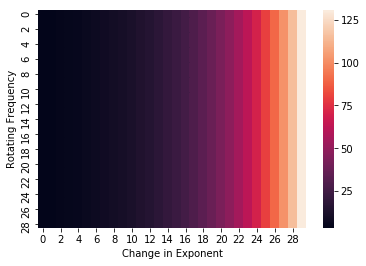

In [7]:
# Plot the calculated ratio measures with different rotation amounts and different rotation frequencies
sns.heatmap(ratios)
plt.xlabel("Change in Exponent");
plt.ylabel("Rotating Frequency");

### Conclusions

In the plot above, we can see that there is a significant effect to rotating power spectra, as ratio measures change as we move along the x-axis. These changes are analogous to simulating different aperiodic exponents.

However, we also see that the frequency at which the rotation occurs has no impact, as there is no variation along the y-axis. This shows that for a given rotation, or change in exponent, regardless of the frequency at which this change occurs, calculated ratios of band powers are unaffected.

Since the simulations here show that the frequency of rotation does not have an impact, simulations across different rotation frequencies were not integrated into the main simulations for the project, nor included in the paper. 